In [88]:
#invite people for the Kaggle party
import pandas
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [89]:
data = pandas.read_excel('/Users/Olamilekan/Desktop/TerragonProjects/data/Onefi_data.xlsx')

copy = data.copy()
copy['Sex'] = copy['Sex'].map({'M':1, 'F':2})

In [90]:
data.head()

,MSISDN,Age,Sex,Total Rev (Monthly spend),Location,Device OS,Device Brand,DATA_REV,VOI_REV,VAS_REV
0,2347062345347,41.0,M,597.83,"5 atunwa street off unity road, , ,",Symbian OS,NOKIA,0.0,252.58,80.0
1,2348062222076,36.0,F,2015.69,"1 taiwo ayoola street, adeyemo layout molete ...",Android,NOKIA,160.0,1718.19,12.0
2,2347063650371,25.0,F,2204.35,NO PLOT 18/20 EIKA ADAGU NEWLAYOUT. NAGAZI UV...,Series40,NOKIA,0.0,2185.60,0.0
3,2347034737336,25.0,M,1597.08,"john wesley house orokun road iju, Unknown, , ,",Android,TECNO,0.0,1462.08,1.0
4,2347032921160,29.0,M,5108.56,S6 abdullahi kure road commissioners quaters m...,Series40,NOKIA,0.0,3866.81,600.0


In [91]:
data.shape

(971, 10)

### Understanding the available columns

##### 1. Total Revenue per month

The cell below describes the Total Montly Revenue in detail. It provides an outlook into it's mean, standard deviation, minimum value, maximum value and 25, 50 and 75% percentiles.

This would help you know the numerical distribution of the monthly spending power.

In [92]:
data['Total Rev (Monthly spend)'].describe()

count      971.000000
mean      3242.725407
std       3183.648514
min          0.000000
25%       1049.580000
50%       2347.265000
75%       4484.135000
max      25252.800000
Name: Total Rev (Monthly spend), dtype: float64

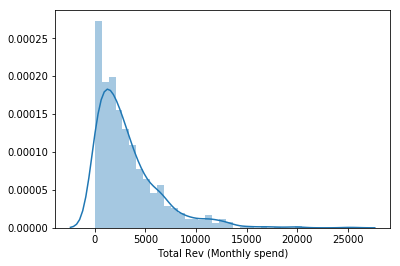

In [93]:
sns.distplot(data['Total Rev (Monthly spend)']);

From the distribution plot above, it can be inferred that the monthly spending power:
    1. Deviates from the normal distribution.
    2. Has appreciable positive skewness.
    2. Shows peakedness.

In [94]:
print("Skewness: %f" % data['Total Rev (Monthly spend)'].skew())
print("Kurtosis: %f" % data['Total Rev (Monthly spend)'].kurt())

Skewness: 1.931279
Kurtosis: 5.541467


Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

### 2. Age

In [95]:
data['Age'].describe()

count    958.000000
mean      31.126305
std        7.338916
min       16.000000
25%       26.000000
50%       30.000000
75%       35.000000
max       67.000000
Name: Age, dtype: float64

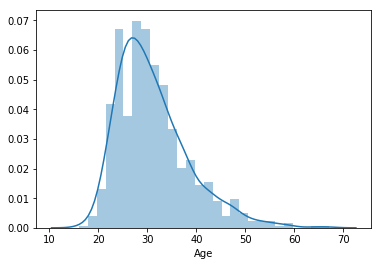

In [96]:
sns.distplot(data['Age'].dropna());

In [97]:
print("Skewness: %f" % data['Age'].skew())
print("Kurtosis: %f" % data['Age'].kurt())

Skewness: 1.147002
Kurtosis: 1.713110


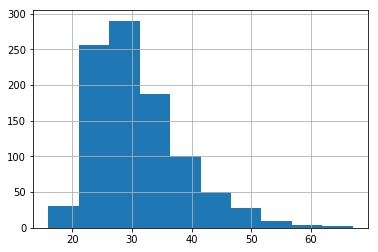

In [98]:
data['Age'].hist()

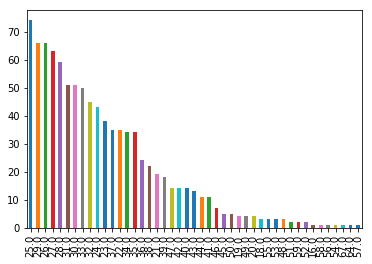

In [99]:
data['Age'].value_counts().plot(kind='bar')

### 3. Sex

In [100]:
data['Sex'].describe()

count     967
unique      3
top         M
freq      746
Name: Sex, dtype: object

In [101]:
sex = data['Sex'].map({'M':1, 'F':2})


###Mapping the sex. 1 represents male and 2 represents female

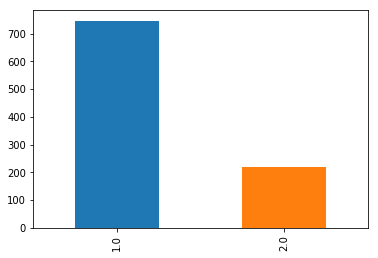

In [102]:
sex.value_counts().plot(kind='bar')

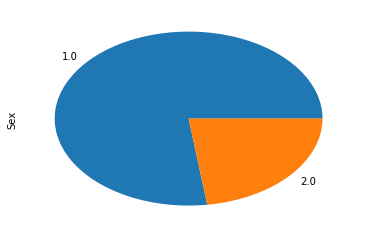

In [103]:
sex.value_counts().plot.pie()

### Device OS

In [104]:
data['Device OS'].describe(include='all')

count         932
unique         16
top       Android
freq          520
Name: Device OS, dtype: object

In [105]:
data['Device OS'].value_counts()


####Showing the count of each os in the data

Android           520
Proprietary OS    157
Symbian OS         78
Series30           56
Blackberry OS      50
Series40           35
iOS                11
Windows phone       8
Samsung OS          6
Series60            4
Windows Mobile      2
Siemens OS          1
Asha Software       1
LG OS               1
MTK RTOS            1
Panasonic OS        1
Name: Device OS, dtype: int64

## Anaylising relationships with montly spending power.

### a. Age and Montly Spending power

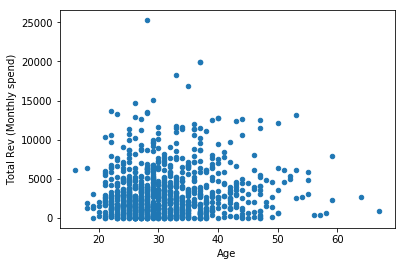

In [107]:
copy.plot(x='Age', y='Total Rev (Monthly spend)', kind='scatter')

The figure above shows a scatte plot showing the relationships between age and the monthly spending power.
There's a bit of a linear relationship there.

### b. Sex and monthly power

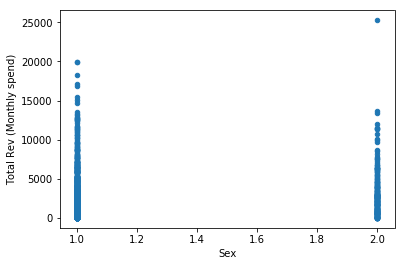

In [112]:
copy.plot(x='Sex', y='Total Rev (Monthly spend)', kind='scatter')

In [ ]:
A scatter plot can't tell much about the relationships so let's attempt to use subplots

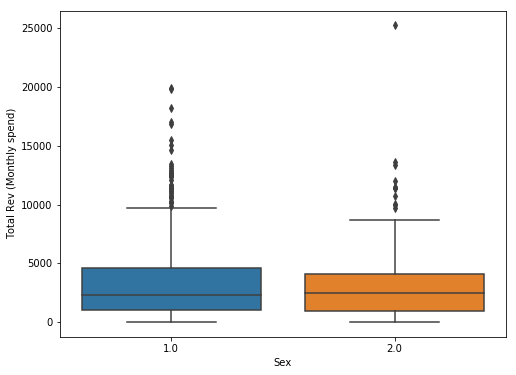

In [115]:
#box plot overallqual/saleprice
var = 'Sex'
data = pandas.concat([copy['Total Rev (Monthly spend)'], copy[var]], axis=1)
f, ax = plot.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Total Rev (Monthly spend)", data=copy)

In [137]:
a = copy.groupby('Sex').Age

In [148]:
copy.groupby('Sex')['Total Rev (Monthly spend)'].agg(['min', 'max', 'count'])

,min,max,count
Sex,,,
1.0,0.0,19919.7,746
2.0,0.0,25252.8,220


The aggregation table above shows the relationship between Sex and the monthly spending power.It shows that the maximum about of money spent by a male is 19919.7 naira and that of a female is 252525.8 naira.

### Device OS and Monthly Spending Power

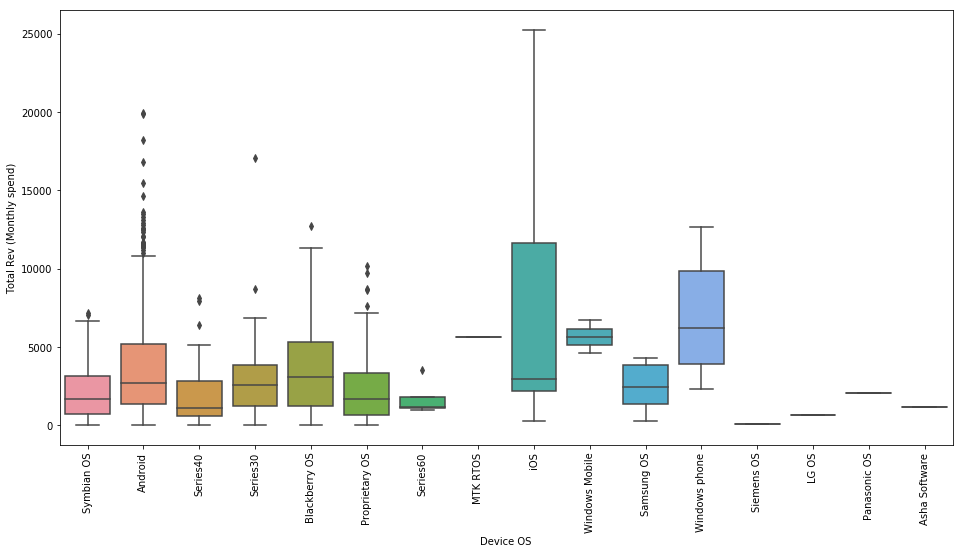

In [154]:
var = 'Device OS'
data = pandas.concat([copy['Total Rev (Monthly spend)'], copy[var]], axis=1)
f, ax = plot.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Total Rev (Monthly spend)", data=copy)
plot.xticks(rotation=90);

In [157]:
copy.groupby('Device OS')['Age'].agg(['count'])

,count
Device OS,
Android,513
Asha Software,1
Blackberry OS,50
LG OS,1
MTK RTOS,1
Panasonic OS,1
Proprietary OS,156
Samsung OS,6
Series30,55


An aggreation table showing number of users on each device OS

### Device Brand Monthly Spending Power

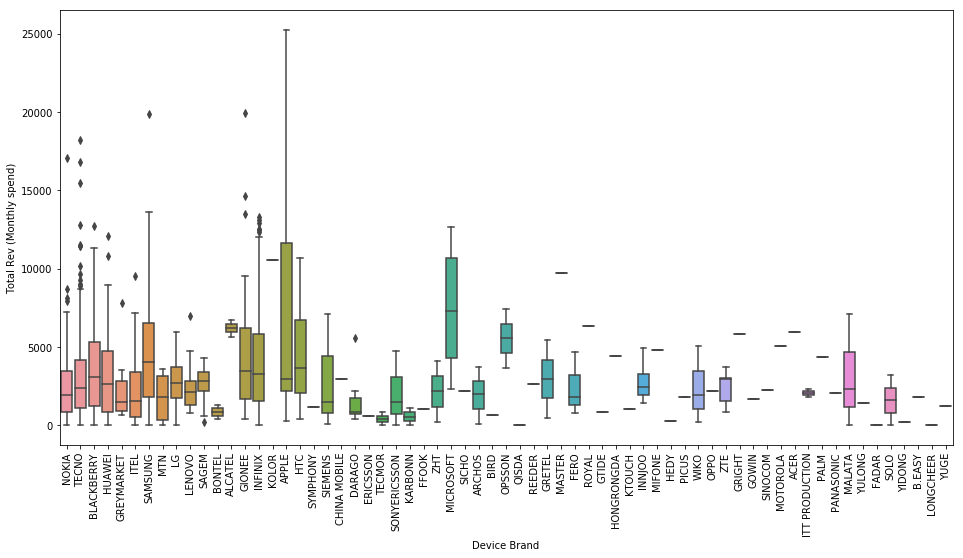

In [160]:
var = 'Device Brand'
data = pandas.concat([copy['Total Rev (Monthly spend)'], copy[var]], axis=1)
f, ax = plot.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Total Rev (Monthly spend)", data=copy)
plot.xticks(rotation=90);

In [163]:
copy.groupby('Device Brand')['Age'].agg(['count', 'max'])

,count,max
Device Brand,,
ACER,1,29.0
ALCATEL,2,32.0
APPLE,11,44.0
ARCHOS,3,35.0
B.EASY,1,27.0
BIRD,1,24.0
BLACKBERRY,50,48.0
BONTEL,2,39.0
CHINA MOBILE,1,24.0


An aggreation table showing number of users on each device OS

# Correlation 

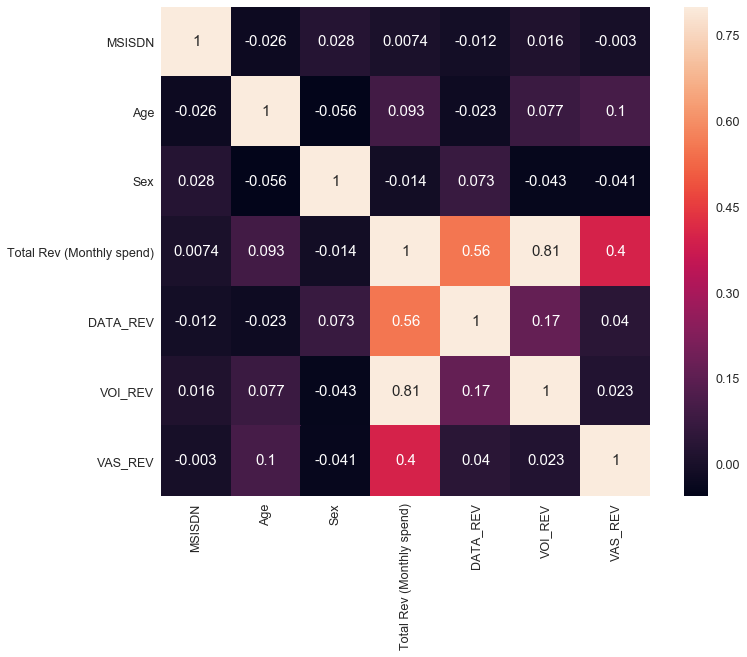

In [174]:
corrmat = copy.corr()
f, ax = plot.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

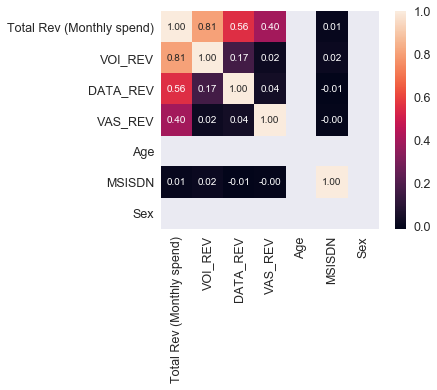

In [175]:
k = 10 
cols = corrmat.nlargest(k, 'Total Rev (Monthly spend)')['Total Rev (Monthly spend)'].index
cm = np.corrcoef(copy[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plot.show()

The heatmap above shows the most variables to 'Total Rev (Monthly spend)'.

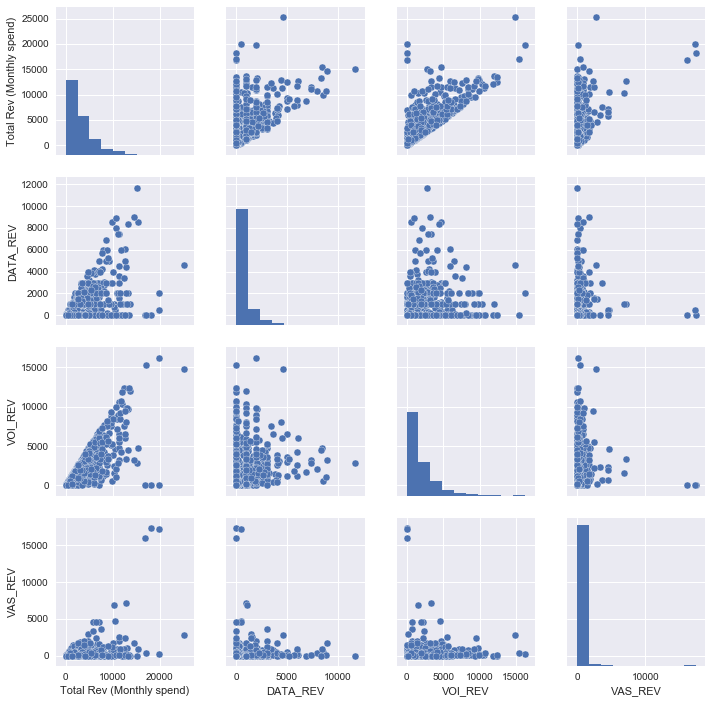

In [188]:
sns.set()
cols = [
 'Total Rev (Monthly spend)',
 'Device OS',
 'Device Brand',
 'DATA_REV',
 'VOI_REV',
 'VAS_REV']
sns.pairplot(copy[cols], size = 2.5)
plot.show();

In [190]:
#missing data
total = copy.isnull().sum().sort_values(ascending=False)
percent = (copy.isnull().sum()/copy.isnull().count()).sort_values(ascending=False)
missing_data = pandas.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Device OS,39,0.040165
Device Brand,22,0.022657
Age,13,0.013388
Sex,5,0.005149
VAS_REV,0,0.000000
VOI_REV,0,0.000000
DATA_REV,0,0.000000
Location,0,0.000000
Total Rev (Monthly spend),0,0.000000
MSISDN,0,0.000000


Percentage missing data for each of the available columns